In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Ex 1**


In [2]:
def exp(lam):
  x = float((-np.log(np.random.uniform()))/lam)
  return x

In [3]:
def norm_abs():

  y = exp(1)
  u = np.random.uniform()
  while u > np.exp(-((y-1)**2)/2):
    y = exp(1)
    u = np.random.uniform()
  return y

In [4]:
def bernoulli(p):
  u = np.random.rand()
  if u <= p:
    return 1
  else:
    return 0

In [5]:
def norm_padrao_(n):
  lista = []
  for i in range(n):
    if bernoulli(0.5) == 1:
       lista.append(norm_abs())
    else: lista.append(-norm_abs())
  return lista

In [6]:
def norm_ger(mu, sigma2, n):
  lista = []
  nnorm = norm_padrao_(n)
  for i in range (n):
    lista.append(np.sqrt(sigma2)*(nnorm[i]+mu))
  return lista

In [7]:
amostra_norm_padrao = norm_padrao_(10000)

via monte carlo


In [8]:
n = 10000
for i in range(n):
  j = 0
  if amostra_norm_padrao[i] > 10:
    j += 1
print(j/n)


0.0


via importance sampling

In [9]:
def norm_pdf(x,mi = 0, sigma = 1):
  return(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-mi)**2/(2*sigma**2))

In [10]:
n = 10000


In [11]:
xq = norm_ger(10,1,n)
xq = np.array(xq)

In [12]:
w = norm_pdf(xq,0,1)/norm_pdf(xq,10,1)

In [13]:
hx = []
for i in range(n):

  if xq[i] > 10:
    hx.append(1)
  else: hx.append(0)
  hx

In [14]:
np.mean(np.array(hx)*w)

np.float64(7.300241345284262e-24)

In [15]:
hx

[1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,


In [16]:
np.mean(hx*w)

np.float64(7.300241345284262e-24)

Comparando as estimativas, temos que via monte carlo é igual a 0, e via IS é
muito próxima de 0

**Ex 2**

1

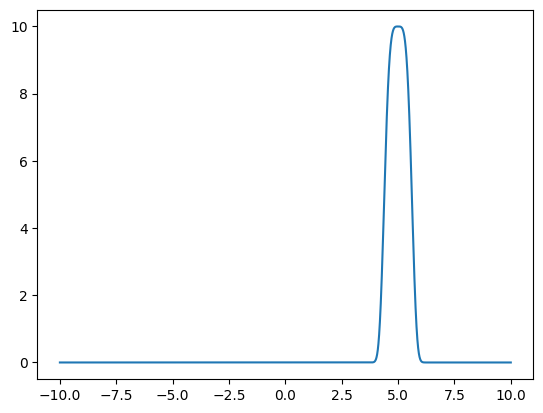

In [70]:
x = np.linspace(-10, 10, n)
gx = 10*np.exp(-5*(x-5)**4)

plt.plot(x, gx)

2

In [76]:
norm_p = norm_pdf(x, 0, 1)
norm_g = norm_pdf(x,5,1)

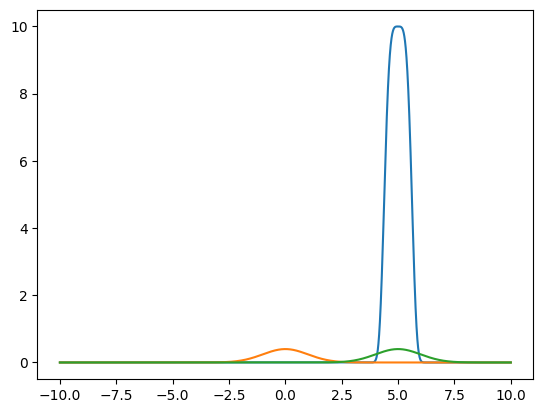

In [77]:
plt.plot(x, gx)
plt.plot(x,norm_p)
plt.plot(x,norm_g)

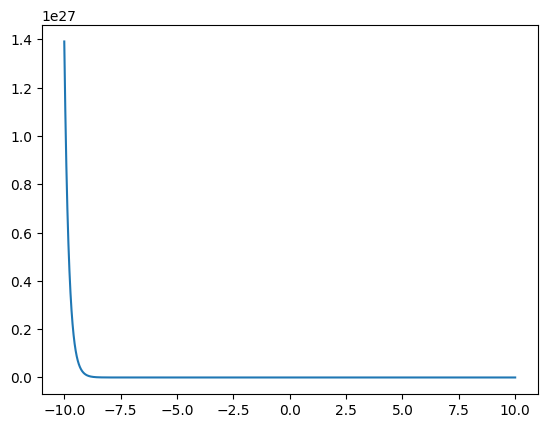

In [79]:
pesos = norm_p/norm_g
plt.plot(x,pesos)

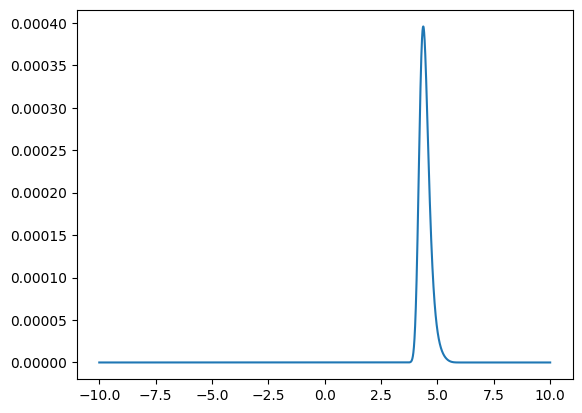

In [81]:
termo = (gx*norm_p)/norm_g
plt.plot(x,termo)

naive

In [85]:
prod = gx*norm_p
sum(prod)/10000

np.float64(3.6626262539632553e-06)

importance sampling


In [88]:
h = gx

In [89]:
w = norm_p/norm_g


In [91]:
produto = h*w
np.mean(produto)

np.float64(1.0907589457913344e-05)

via naive: 3.6626262539632553e-06

via importance sampling: 1.0907589457913344e-05
